# WINE QUALITY ANALYSIS AND PREDICTION
Link for Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

## Problem Statement
The dataset is related to red vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

### Input variables (based on physicochemical tests):

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

### Output variable (based on sensory data):

12 - quality (score between 0 and 10) 

### Steps in modeling:

    1. Data exploration
    2. Feature Wngineering
    3. Model prediction
    4. Tuning and evaluation
    5. Prediction

## 1. Data Loading & Exploration

In [275]:
#importing required libraries for exploratory data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
#loading data into pandas dataframe

df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [277]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [278]:
#checking for missing or null values

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [279]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [280]:
# extracting feature names form the dataset

features = (list(df.columns))
features.remove('quality')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

### 1.1 Plotting frequency distribution of all features

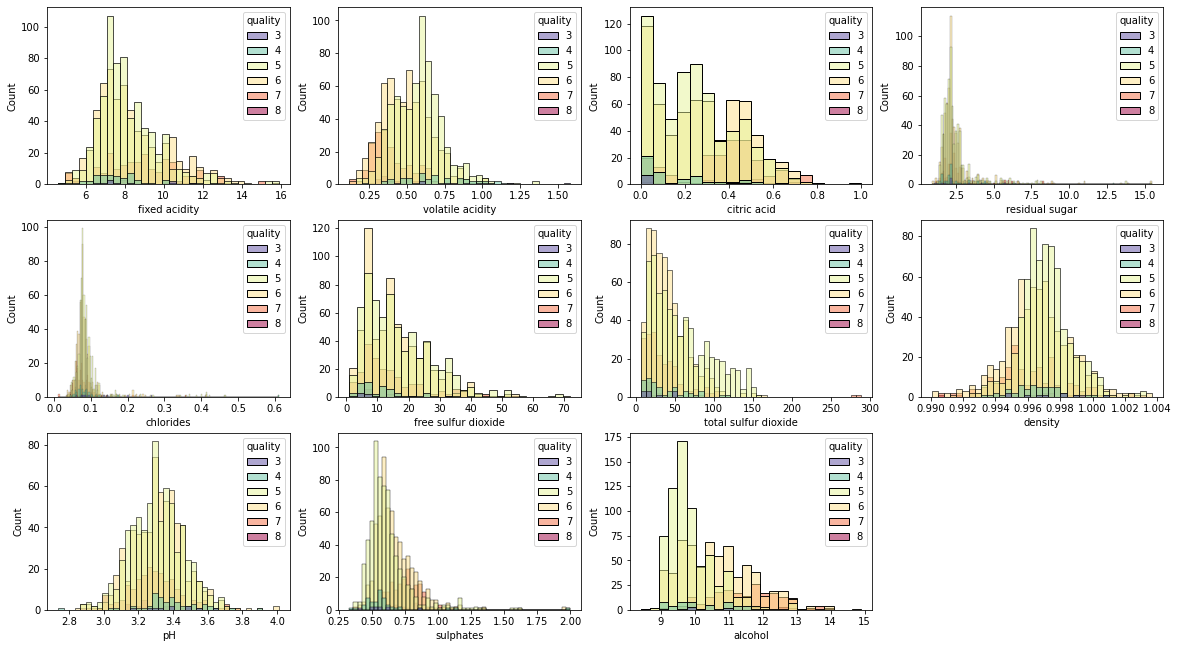

In [281]:
i=1
plt.figure(figsize = (20,15))
for fe in features:
    plt.subplot(4,4,i,)
    sns.histplot(x=fe, data = df,legend=True,hue='quality',palette='Spectral_r')
    i=i+1

<AxesSubplot:>

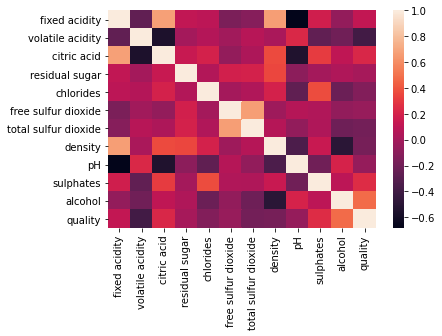

In [282]:
#correlation between the features and quality
sns.heatmap(df.corr())

### 1.2 Plotting features with target variable(quality)

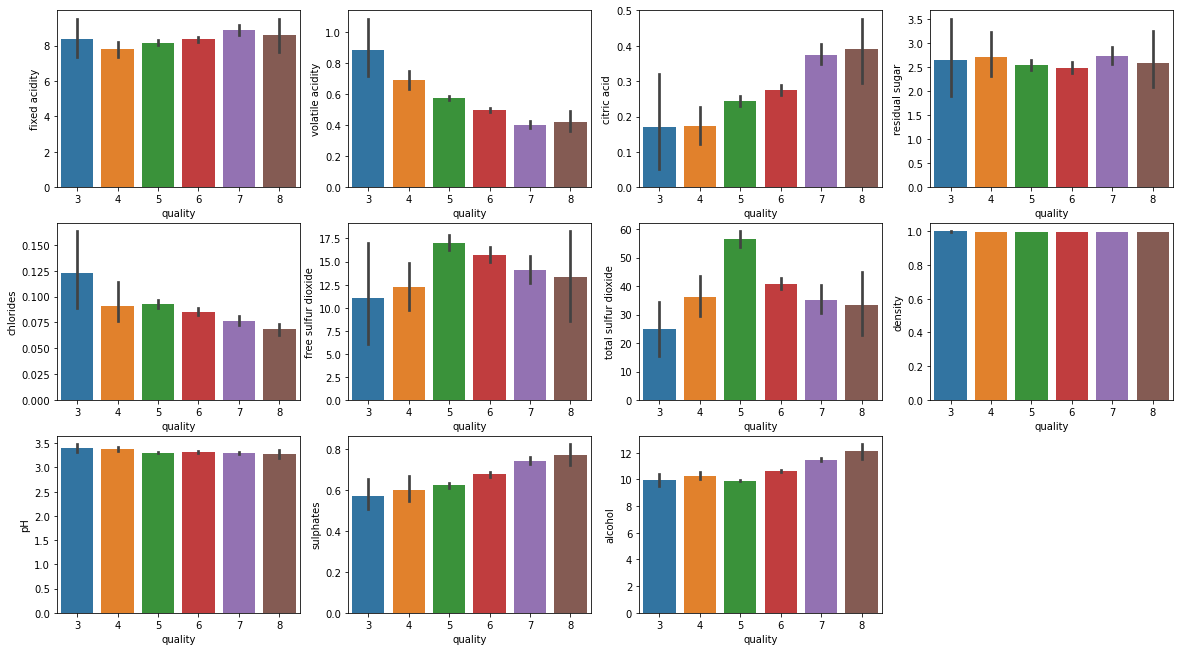

In [283]:
i=1
plt.figure(figsize = (20,15))
for fe in features:
    plt.subplot(4,4,i,)
    sns.barplot(x='quality', y=fe, data = df)
    i=i+1

From the graphs we can see that:

    1. Quality increases with increase in citric acid, sulphates and alcohol. (positively correlated)
    2. Quality increases with decrease in volatile acidity and chlorides. (negatively correlated)
    3. There is no effect of density and ph on quality. (zero correlation)
    4. Fixed acidity, residual sugar and sulphur dioxide shows no particular trend with quality.

## 2. Feature Engineering

 Converting quality into two categories:
 
    1. 0 for bad quality
    2. 1 for good quality
    
The quality lies between 2 and 8, so dividing them into 2 categories low quality(0) for 6.5 and below and high quality(1) for 6.5 and above.

In [284]:
bins = (2, 6.5, 8)
group_names = [0, 1]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

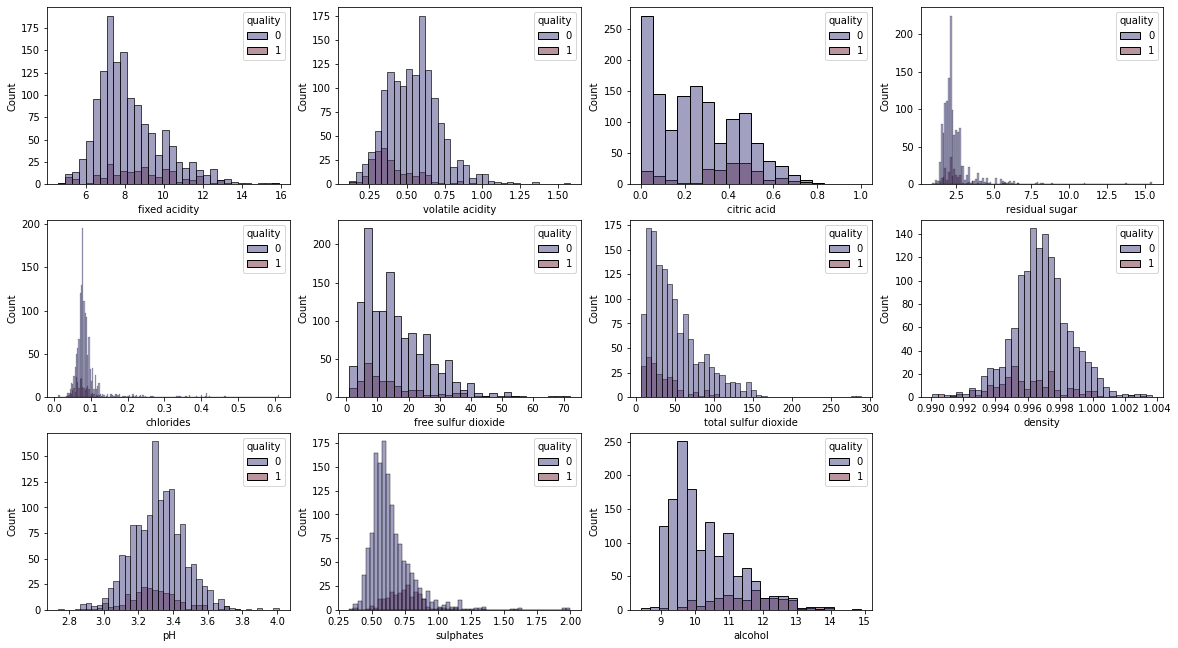

In [285]:
i=1
plt.figure(figsize = (20,15))
for fe in features:
    plt.subplot(4,4,i,)
    sns.histplot(x=fe, data = df,legend=True,hue='quality',palette='icefire')
    i=i+1

It can be inferred that for a wine to be of good quaity:
 1. fixed acidity should be between  and 12
 2. volatile acidity should be around 0.30
 3. citric acid should be around 0.4
 4. residual sugar should be around 0.2
 5. chlorides should be less than 0.1
 6. free sulphor dioxide should be between 0-20
 7. total sulphur dioxide should be below 50
 8. density should be less than 1
 9. ph should be acidic
 10. sulphates should be below 1
 11. alcohol shpuld be grater than 10
 
 (All measures in standard measuring units)

In [286]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:xlabel='quality', ylabel='count'>

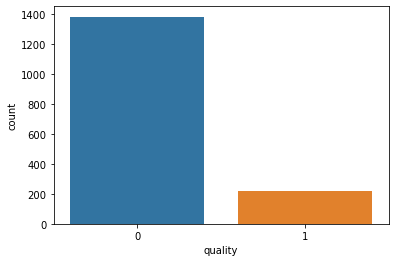

In [287]:
# number of samples in each category of quality
sns.countplot(x= 'quality',data = df)

We must note that there is a significant class imbalance in the dataset.
This tells us that accuracy is not at all a good metrics to determine and compare the performance of our models. 
We can instead use the F1 score to ensure that the class imbalance does not give us a false idea that our model is performing well.

The F1 score for this model will be very low since it takes into account both the precision and the recall of our predictions.

Hence, the F1 score will be more reliable and robust compared to the accuracy.


In [288]:
pd.value_counts(df['quality'])

0    1382
1     217
Name: quality, dtype: int64

### 2.2 Converting the data to same scale

We can see from the frequency plot that all the features are on not saame scale, so scaling them to same scale (in the scale of 0-1).

In [289]:
from sklearn.preprocessing import minmax_scale

X= df.drop('quality',axis=1)
y=df['quality']
def scale_it(X):
    return minmax_scale(X)

X= X.apply(scale_it)

In [290]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


### 2.3  Performing train-test split of data

In [291]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## 3. Model making

In [292]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

### 4. Model Evaluation 

In [293]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
predicted = model.predict(x_test)

In [294]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       267
           1       0.63      0.51      0.56        53

    accuracy                           0.87       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.86      0.87      0.86       320



In [295]:
confusion_matrix(y_test, predicted)

array([[251,  16],
       [ 26,  27]], dtype=int64)

### 5. Making predictions 

In [296]:
data = [4.4,0.50,0.20,1.1,0.276,7.0,23.0,0.438,1.51,0.52,9.4]
scale_it(data)
if(model.predict([data])==1):
    print('Nice Quality! :)')
else:
    print('Not good! ;(')

Nice Quality! :)


In [297]:
data = [4.4,0.90,0.20,1.1,0.976,7.0,23.0,0.438,1.51,0.1,2.4]
scale_it(data)
if(model.predict([data])==1):
    print('Nice Quality! :)')
else:
    print('Not good! ;(')

Not good! ;(
